# Linear SVC Assignment

In [ ]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Import the admissions data set (admissions.csv).

In [ ]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Admitted', axis=1)
y = data['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',C=10)

svc.fit(X_train, y_train)

print("Train score: ",svc.score(X_train, y_train))
print("Test score: ",svc.score(X_test, y_test))

Train score:  0.8928571428571429
Test score:  0.825


### Choose some other values for C and show the difference between the scores for the train and test sets.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_train = []
accuracy_test = []
c_list = np.arange(.1, 10, .1)

for c_val in c_list:
  svc = SVC(kernel='linear',C=c_val)
  svc.fit(X_train, y_train)
  accuracy_train.append(svc.score(X_train,y_train))
  accuracy_test.append(svc.score(X_test,y_test))

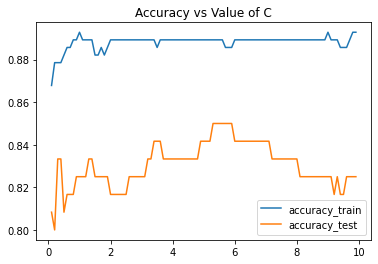

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(c_list, accuracy_train)
plt.plot(c_list, accuracy_test)
plt.title('Accuracy vs Value of C')
plt.legend(['accuracy_train', 'accuracy_test'])
plt.show()

### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [ ]:
data.SchoolRank.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: SchoolRank, dtype: int64

In [ ]:
X = data.drop('SchoolRank', axis=1)
y = data['SchoolRank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
svc = SVC(kernel='linear',C=10)

svc.fit(X_train, y_train)

print("Train score: ",svc.score(X_train, y_train))
print("Test score: ",svc.score(X_test, y_test))

Train score:  0.6357142857142857
Test score:  0.575


### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

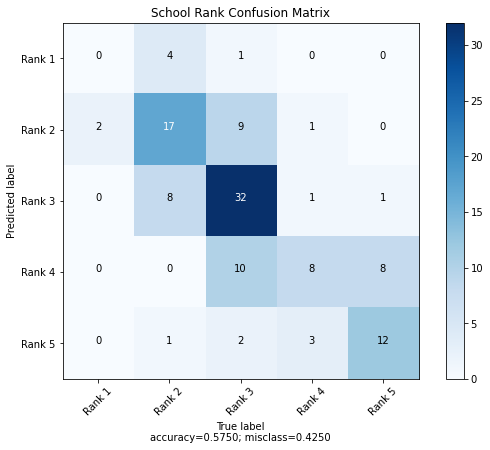

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix
y_test_pred = svc.predict(X_test)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Rank 1','Rank 2','Rank 3','Rank 4','Rank 5'],title = 'School Rank Confusion Matrix',normalize=False)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.57      0.59      0.58        29
           3       0.59      0.76      0.67        42
           4       0.62      0.31      0.41        26
           5       0.57      0.67      0.62        18

    accuracy                           0.57       120
   macro avg       0.47      0.46      0.45       120
weighted avg       0.56      0.57      0.55       120



We see that precision was best with the classes that had the two biggest samples (0.64, 0.67). Precision was relatively worse on the 5th ranked group (0.44) compared to the other group's precision (0.60, 0.67, 0.64, 0.58). 

Recall was best (0.85) on the group that had the largest number of observations (the 3rd rank class) and was relatively high (0.67) on group 5, which is a bit suprising with the low support for that group. Recall was worst on Group 4 (0.32). 

F1 Score was best for Group 3 (0.73) which was also the highest support group. F1 Score was worst for group 4 (0.41). 

Overall its not suprising that the group with the largest support had the best recall and F1 scores and the second best precision score. 